In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nslkdd/KDDTest+.arff
/kaggle/input/nslkdd/KDDTest-21.arff
/kaggle/input/nslkdd/KDDTest1.jpg
/kaggle/input/nslkdd/KDDTrain+.txt
/kaggle/input/nslkdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/KDDTest-21.txt
/kaggle/input/nslkdd/KDDTest+.txt
/kaggle/input/nslkdd/KDDTrain+.arff
/kaggle/input/nslkdd/index.html
/kaggle/input/nslkdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/KDDTrain1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.arff
/kaggle/input/nslkdd/nsl-kdd/index.html
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTrain1.jpg


# Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from keras.utils import to_categorical
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, SimpleRNN , GRU , Activation
# from keras.layers.normalization import BatchNormalization
from keras import optimizers
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D , AveragePooling1D
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Reshape, LayerNormalization, MultiHeadAttention,Concatenate
import keras
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Conv1D, GlobalMaxPooling1D, Activation, Dense, Dropout, Lambda
from keras.utils import to_categorical

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import load_model
!pip install pycm
import pycm
from pycm import *
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, accuracy_score,mean_squared_error,mean_absolute_error)

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import CSVLogger

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 597.6/597.6 kB 14.1 MB/s eta 0:00:0000:01


# Import Dataset

In [3]:
train='/kaggle/input/nslkdd/KDDTrain+.txt'
test='/kaggle/input/nslkdd/KDDTest+.txt'
test21='/kaggle/input/nslkdd/KDDTest-21.txt'

# Preparing Dataset

In [4]:
featureV=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

binary_attack=['normal','ipsweep', 'nmap', 'portsweep','satan', 'saint', 'mscan','back', 'land', 'neptune', 'pod', 'smurf',
               'teardrop', 'apache2', 'udpstorm', 'processtable','mailbomb','buffer_overflow', 'loadmodule', 'perl', 'rootkit',
               'xterm', 'ps', 'sqlattack','ftp_write', 'guess_passwd', 'imap', 'multihop','phf', 'spy', 'warezclient',
               'warezmaster','snmpgetattack','named', 'xlock', 'xsnoop','sendmail', 'httptunnel', 'worm', 'snmpguess']

multiclass_attack={ 'normal': 'normal',
        'probe': ['ipsweep.', 'nmap.', 'portsweep.','satan.', 'saint.', 'mscan.'],
        'dos': ['back.', 'land.', 'neptune.', 'pod.', 'smurf.','teardrop.', 'apache2.', 'udpstorm.', 'processtable.','mailbomb.'],
        'u2r': ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.','xterm.', 'ps.', 'sqlattack.'],
        'r2l': ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.','phf.', 'spy.', 'warezclient.', 'warezmaster.','snmpgetattack.',
                   'named.', 'xlock.', 'xsnoop.','sendmail.', 'httptunnel.', 'worm.', 'snmpguess.']}              

In [5]:
train_data=pd.read_csv(train,names=featureV)
test_data=pd.read_csv(test,names=featureV)
test_21 = pd.read_csv(test21, names= featureV)

In [6]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [7]:
print(np.shape(train_data))
print(np.shape(test_data))
print(np.shape(test_21))

(125973, 43)
(22544, 43)
(11850, 43)


# HeatMap

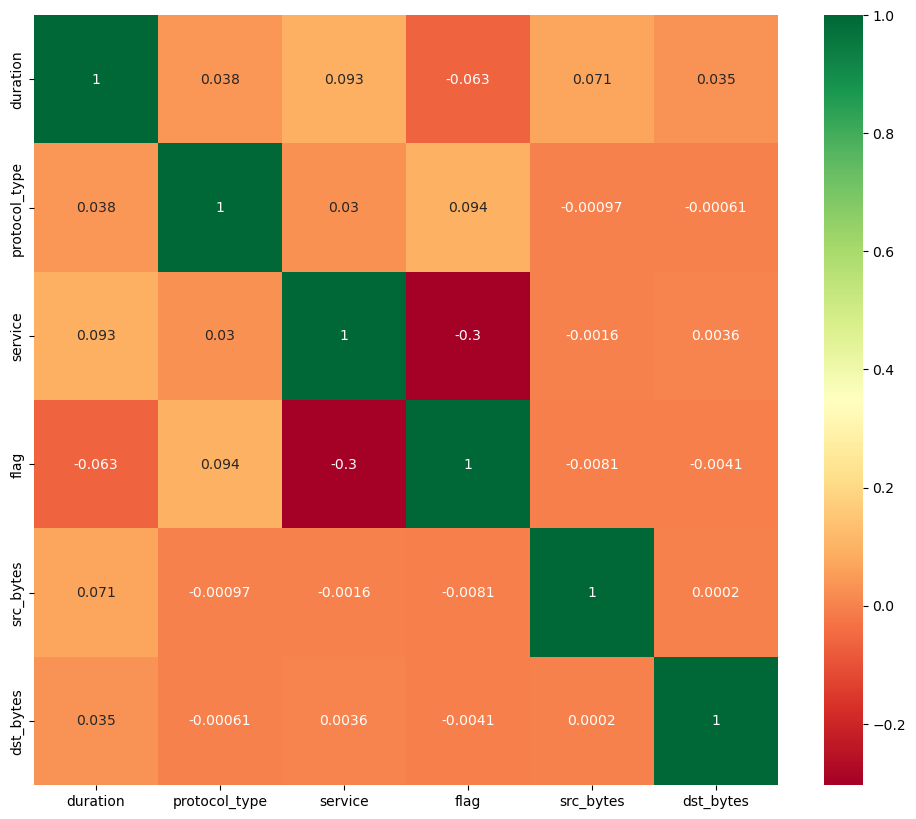

In [8]:
heatmap = pd.read_csv(train,names=featureV)
cat_cols = ["protocol_type", "service", "flag"]
le = LabelEncoder()
for col in cat_cols:
    heatmap[col] = le.fit_transform(heatmap[col])

train_data_heatmap = heatmap[['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes']]

plt.figure(figsize=(12,10))
p=sns.heatmap(train_data_heatmap.corr(), annot=True,cmap ='RdYlGn') 

# Data Preprocessing

In [9]:
train_data = train_data.drop_duplicates()
train_data = train_data.dropna()

test_data = test_data.drop_duplicates()
test_data = test_data.dropna()

test_21 = test_21.drop_duplicates()
test_21 = test_21.dropna()

In [10]:
train_data = train_data[['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'label']]

# One-hot encode the categorical data
train_data = pd.get_dummies(train_data, columns=['protocol_type', 'service', 'flag'])

test_data = test_data[['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'label']]

# One-hot encode the categorical data
test_data = pd.get_dummies(test_data, columns=['protocol_type', 'service', 'flag'])

test_21 = test_21[['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'label']]

# One-hot encode the categorical data
test_21 = pd.get_dummies(test_21, columns=['protocol_type', 'service', 'flag'])

In [11]:
test_data['dummy1'] = 0
test_data['dummy2'] = 0
test_data['dummy3'] = 0
test_data['dummy4'] = 0
test_data['dummy5'] = 0
test_data['dummy6'] = 0

# <<-------------------------------------------------------------------------------->>

test_21['dummy1'] = 0
test_21['dummy2'] = 0
test_21['dummy3'] = 0
test_21['dummy4'] = 0
test_21['dummy5'] = 0
test_21['dummy6'] = 0
test_21['dummy7'] = 0
test_21['dummy8'] = 0

In [12]:
print(np.shape(train_data))
print(np.shape(test_data))
print(np.shape(test_21))

(125973, 88)
(22544, 88)
(11850, 88)


In [13]:
def preprocessing(data,cls,df):
  
#----------attack categorization----------------->
  data['label']=data['label'].replace(['normal.','normal'],0)

#----------------------binary classification--------------------->
  if cls=='binary':
    for i in range(len(binary_attack)):
      data['label'] = data['label'].replace(binary_attack[i], 1)
  
#---------------multiclass classification-------------------->  
  elif cls=='multiclass':
    for i in range(len(multiclass_attack['probe'])):
      data['label']=data['label'].replace([multiclass_attack['probe'][i],multiclass_attack['probe'][i][:-1]],1)
    
    for i in range(len(multiclass_attack['dos'])):
      data['label']=data['label'].replace([multiclass_attack['dos'][i],multiclass_attack['dos'][i][:-1]],2)
    
    for i in range(len(multiclass_attack['u2r'])):
      data['label']=data['label'].replace([multiclass_attack['u2r'][i],multiclass_attack['u2r'][i][:-1]],3)
    
    for i in range(len(multiclass_attack['r2l'])):
      data['label'] = data['label'].replace([multiclass_attack['r2l'][i],multiclass_attack['r2l'][i][:-1]],4)
#------------------------------------------------>


#-------------------------splitting features and labels---------------->
  y=data['label']
  x=data.iloc[:, :-1]

#-----------------converting to binary label vectors--------------------------------------> 
  yt=y.copy()
  yt=pd.get_dummies(yt)
#------------------------------------------------------------------------------>

  x = MinMaxScaler(feature_range=(0, 1)).fit_transform(x)
    
  return x,yt


In [14]:
x_train,Y_train=preprocessing(train_data,cls='binary',df='train')
x_test,Y_test=preprocessing(test_data,cls='binary',df='test')
x_21_test, y_21_test = preprocessing(test_21, cls = 'binary', df = 'test21')

In [15]:
print(np.shape(x_train))
print(np.shape(Y_train))
print(np.shape(x_test))
print(np.shape(Y_test))
print(np.shape(x_21_test))
print(np.shape(y_21_test))

(125973, 87)
(125973, 2)
(22544, 87)
(22544, 2)
(11850, 87)
(11850, 2)


In [16]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(125973, 87, 1)

In [17]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(22544, 87, 1)

In [18]:
x_21_test = np.reshape(x_21_test, (x_21_test.shape[0], x_21_test.shape[1], 1))
x_21_test.shape

(11850, 87, 1)

# **Model**

In [19]:
inputs = Input(shape=(x_train.shape[1], 1))
x = Convolution1D(512, 3, padding="same",activation="relu")(inputs)
x = tf.keras.layers.LayerNormalization()(x)
# model.add(Convolution1D(32, 3, activation="relu"))
x = MaxPooling1D(pool_size=(2))(x)
# model.add(tf.keras.layers.LayerNormalization())
# model.add(GRU(units = 128, return_sequences=True, input_shape = (x_train.shape[1], 1)))
x = Dropout(0.5)(x) 
x = Convolution1D(128, 3, padding="same",activation="relu")(x)
x = MaxPooling1D(pool_size=(2))(x)
x = Dropout(0.5)(x) 

x = Convolution1D(64, 4, padding="same",activation="relu")(x)
x = MaxPooling1D(pool_size=(2))(x)
x = Dropout(0.5)(x)
print(x.shape)

# num_heads = 16
# key_dim = 128
# value_dim = 128
# attention = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim, value_dim=value_dim)
# attention_output = attention(x, x)
# # Reshape the output of multihead attention layer to match the input shape of dense layers
# attention_reshape = Reshape((10, 64,))(attention_output)
# # Normalize the output of multihead attention layer
# attention_norm = LayerNormalization()(attention_reshape)
    
# Flatten the output of multihead attention layer
flattened_attention = Flatten()(x)

d2 = Dense(128, activation="relu")(flattened_attention)
d3 = Dropout(0.5)(d2)
output = Dense(2, activation="softmax")(d3)

(None, 10, 64)


In [20]:
model = keras.Model(inputs=inputs, outputs=output)

In [21]:
model.compile(optimizer = 'adam' ,loss = 'categorical_crossentropy', metrics = ['accuracy'])

# **Save Model**

In [22]:
filepath = '/kaggle/working/binary_model_without_attention_final.hdf5'
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True,
                             mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', mode='max',factor=0.5, patience=5, min_lr=0.001)
csv_logger = CSVLogger('training.log')

callbacks_list = [checkpoint, reduce_lr, csv_logger]

In [23]:
history = model.fit(x_train, Y_train, epochs = 150, validation_data=(x_test, Y_test),batch_size = 512, callbacks= callbacks_list)

Epoch 1/150
247/247 [==============================] - ETA: 0s - loss: 0.0268 - accuracy: 0.9885
Epoch 1: val_accuracy improved from -inf to 0.99991, saving model to /kaggle/working/binary_model_without_attention_final.hdf5
247/247 [==============================] - 25s 43ms/step - loss: 0.0268 - accuracy: 0.9885 - val_loss: 3.4348e-04 - val_accuracy: 0.9999 - lr: 0.0010
Epoch 2/150
245/247 [============================>.] - ETA: 0s - loss: 2.0688e-04 - accuracy: 0.9999
Epoch 2: val_accuracy improved from 0.99991 to 0.99996, saving model to /kaggle/working/binary_model_without_attention_final.hdf5
247/247 [==============================] - 10s 40ms/step - loss: 2.0613e-04 - accuracy: 0.9999 - val_loss: 1.3798e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/150
245/247 [============================>.] - ETA: 0s - loss: 2.4692e-04 - accuracy: 0.9999
Epoch 3: val_accuracy improved from 0.99996 to 1.00000, saving model to /kaggle/working/binary_model_without_attention_final.hdf5
247/247 [=

# **Load The Model**

In [24]:
from tensorflow.keras.models import load_model

model = load_model('/kaggle/working/binary_model_without_attention_final.hdf5')

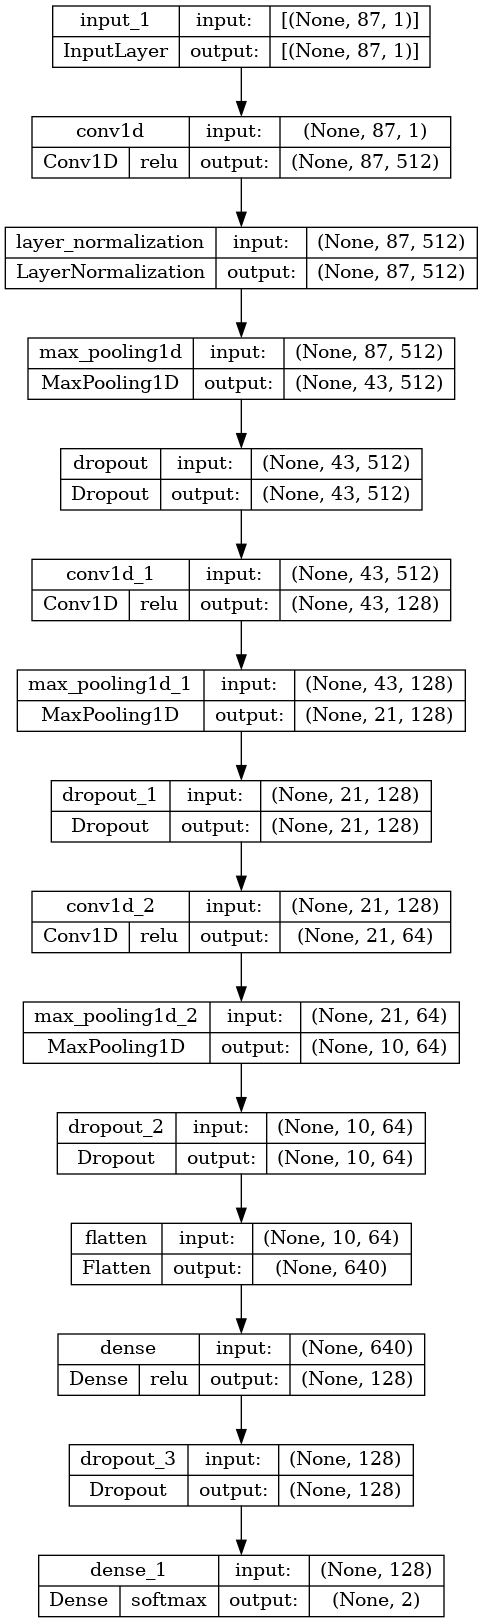

In [25]:
tf.keras.utils.plot_model(model, 'my_first_model.png', show_shapes=True, show_layer_names=True, show_layer_activations= True)

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 87, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 87, 512)           2048      
                                                                 
 layer_normalization (LayerN  (None, 87, 512)          1024      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 43, 512)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 43, 512)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 43, 128)           196736

# Model Evaluation

In [27]:
test_loss, test_acc = model.evaluate(x_21_test, y_21_test)

print(test_loss)
print(test_acc)

371/371 [==============================] - 2s 4ms/step - loss: 3.4905e-05 - accuracy: 1.0000
3.4904667700175196e-05
1.0


In [28]:
accuracy = history.history['accuracy']
epochs = range(1, len(accuracy) + 1)

In [29]:
accuracy

[0.9884816408157349,
 0.999912679195404,
 0.9999047517776489,
 0.9999841451644897,
 1.0,
 0.9999603033065796,
 0.9997618794441223,
 1.0,
 0.9999285340309143,
 0.9998332858085632,
 0.9999444484710693,
 0.9999920725822449,
 0.9999841451644897,
 0.9999603033065796,
 0.9999841451644897,
 1.0,
 1.0,
 0.9999761581420898,
 0.9999920725822449,
 1.0,
 0.9999761581420898,
 0.999912679195404,
 0.9999841451644897,
 1.0,
 0.9999841451644897,
 0.9999761581420898,
 0.9999920725822449,
 0.9999920725822449,
 1.0,
 1.0,
 1.0,
 0.9999761581420898,
 0.9999206066131592,
 0.9999761581420898,
 0.9999761581420898,
 1.0,
 0.9999761581420898,
 0.9999920725822449,
 1.0,
 0.9999841451644897,
 0.9999761581420898,
 1.0,
 0.9999841451644897,
 0.9999920725822449,
 1.0,
 1.0,
 0.9999841451644897,
 0.9999444484710693,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999920725822449,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999761581420898,
 1.0,
 0.9999841451644897,
 1.0,
 1.0,
 0.9999761581420898,
 0.9999444484710693,
 1.0,
 1.0,
 1.0,
 1.

# Plot Necessary Graphs

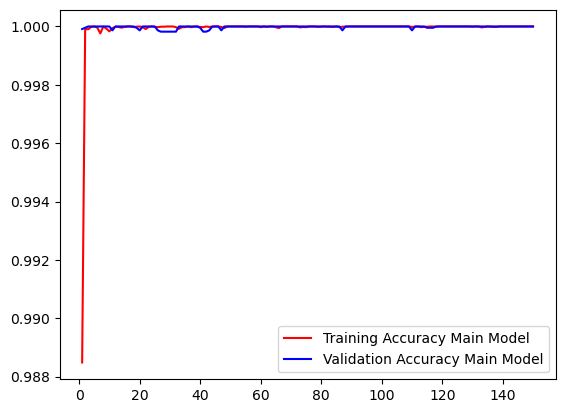

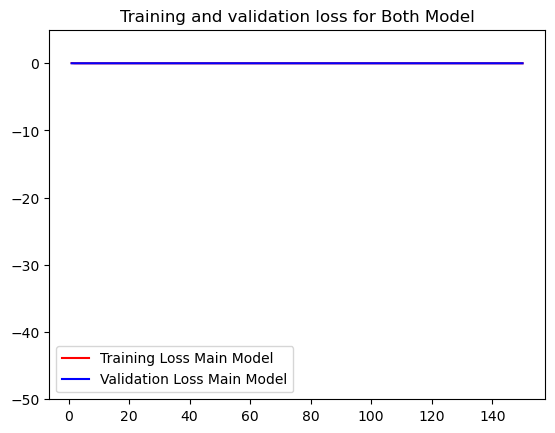

In [30]:
import matplotlib.pyplot as plt
main_acc = history.history['accuracy']

main_val_acc = history.history['val_accuracy']


main_loss = history.history['loss']

main_val_loss = history.history['val_loss']


epochs = range(1, len(main_acc) + 1)

plt.plot(epochs, main_acc, 'r', label='Training Accuracy Main Model')


plt.plot(epochs, main_val_acc, 'b', label='Validation Accuracy Main Model')
plt.legend()
plt.grid(False)
plt.savefig('Net_aaccuracy.png', bbox_inches='tight',dpi=600)

plt.figure()

plt.plot(epochs, main_loss, 'r', label='Training Loss Main Model')

plt.plot(epochs, main_val_loss, 'b', label='Validation Loss Main Model')

plt.ylim([-50, 5])
plt.title('Training and validation loss for Both Model')

plt.legend()
plt.grid(False)
plt.savefig('Net_loss.png', bbox_inches='tight',dpi=600)
plt.show()

# Confusion Matrix

371/371 [==============================] - 1s 2ms/step
[[2152    0]
 [   0 9698]]


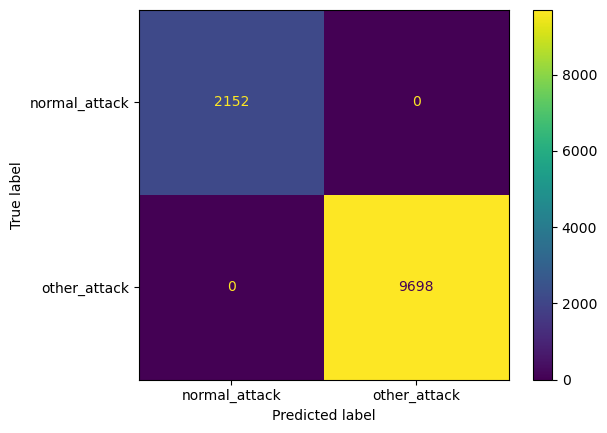

In [31]:
# Convert DataFrame to NumPy array
y_21_test_array = y_21_test.to_numpy()

# Reshape the one-hot encoded labels
Y_test_reshaped = y_21_test_array.reshape(-1, 2)

# Obtain the predicted values
Y_pred = model.predict(x_21_test)

# Convert the one-hot encoded labels to scalar values
Y_test_scalar = np.argmax(Y_test_reshaped, axis=1)
Y_pred_scalar = np.argmax(Y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(Y_test_scalar, Y_pred_scalar)

# Print the confusion matrix
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["normal_attack","other_attack"])
disp.plot()
plt.savefig('confusion_Net.png', bbox_inches='tight',dpi=600)
plt.grid(False)
plt.show()

In [32]:
CM = ConfusionMatrix(actual_vector=Y_test_scalar, predict_vector=Y_pred_scalar)
CM.relabel(mapping={0:"normal_attack",1:"other_attack"})

In [33]:
print(CM)

Predict             normal_attack       other_attack        
Actual
normal_attack       2152                0                   

other_attack        0                   9698                





Overall Statistics : 

95% CI                                                            (1.0,1.0)
ACC Macro                                                         1.0
ARI                                                               1.0
AUNP                                                              1.0
AUNU                                                              1.0
Bangdiwala B                                                      1.0
Bennett S                                                         1.0
CBA                                                               1.0
CSI                                                               1.0
Chi-Squared                                                       11850.0
Chi-Squared DF                                                    1
Con

# Model Evaluation Metrics

In [34]:
from sklearn.metrics import classification_report
target_names = ['normal_attack', 'other_attack']
print(classification_report(Y_test_scalar, Y_pred_scalar, target_names=target_names))

               precision    recall  f1-score   support

normal_attack       1.00      1.00      1.00      2152
 other_attack       1.00      1.00      1.00      9698

     accuracy                           1.00     11850
    macro avg       1.00      1.00      1.00     11850
 weighted avg       1.00      1.00      1.00     11850



In [35]:
acc_21 = accuracy_score(Y_test_scalar, Y_pred_scalar)* 100
recall = recall_score(Y_test_scalar, Y_pred_scalar , average="binary")
precision = precision_score(Y_test_scalar, Y_pred_scalar , average="binary")
f1 = f1_score(Y_test_scalar, Y_pred_scalar, average="binary")

In [36]:
print("accuracy")
print("%.3f" %acc_21)
print("racall")
print("%.3f" %recall)
print("precision")
print("%.3f" %precision)
print("f1score")
print(f1)

accuracy
100.000
racall
1.000
precision
1.000
f1score
1.0
